# Problem Statement:

The dataset contains 6 years of information(weekly stock information) on the stock prices of 10 different Indian Stocks. Calculate the mean and standard deviation on the stock returns and share insights. You are expected to do the Market Risk Analysis using Python.



## Company Data : Loading Libraris & Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Market_Risk_Dataset.csv')

In [3]:
#Let's check the first & last 5 samples of the data
display('First 5 samples:',df.head())
display('Last 5 samples:',df.tail())

'First 5 samples:'

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


'Last 5 samples:'

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
309,02-03-2020,729,120,469,658,33,23110,401,146,3,22
310,09-03-2020,634,114,427,569,30,21308,384,121,6,18
311,16-03-2020,577,90,321,428,27,18904,365,105,3,16
312,23-03-2020,644,75,293,360,21,17666,338,89,3,14
313,30-03-2020,633,75,284,379,23,17546,352,82,3,14


In [4]:
#Fomating the headers
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_').str.replace('&', 'and')

In [5]:
#Let's check the random sample of the data
df.sample(10)

,Date,Infosys,Indian_Hotel,Mahindra_and_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
134,24-10-2016,443,106,633,482,51,16488,726,75,46,459
113,30-05-2016,538,112,643,532,41,13411,719,61,63,558
290,21-10-2019,626,151,589,710,35,20102,415,107,4,20
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
21,25-08-2014,321,89,655,386,78,7726,830,233,95,222
163,15-05-2017,425,128,643,496,60,18406,638,112,53,520
68,20-07-2015,453,91,631,569,57,10752,813,76,106,324
167,12-06-2017,430,117,669,505,56,17540,517,125,47,541
263,15-04-2019,682,152,672,770,56,19572,457,183,17,165
81,19-10-2015,488,84,592,515,55,12414,860,76,84,412


## Exploratory Data Analysis

#### Information About the dataset

In [6]:
#Dimentions of the dataset
print('The number of rows are ',df.shape[0],'\n''The number of columns (variables) are',df.shape[1])

The number of rows are  314 
The number of columns (variables) are 11


In [7]:
#Information about the dataset
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date                   314 non-null    object
 1   Infosys                314 non-null    int64 
 2   Indian_Hotel           314 non-null    int64 
 3   Mahindra_and_Mahindra  314 non-null    int64 
 4   Axis_Bank              314 non-null    int64 
 5   SAIL                   314 non-null    int64 
 6   Shree_Cement           314 non-null    int64 
 7   Sun_Pharma             314 non-null    int64 
 8   Jindal_Steel           314 non-null    int64 
 9   Idea_Vodafone          314 non-null    int64 
 10  Jet_Airways            314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


None

- The dataset consists of 11 columns.
- There are a total of 314 non-null entries in each of the stock price columns, indicating no missing data in these columns.
- All stock price columns contain integer values.


In [8]:
# Descriptive Statistics
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Infosys,314.0,511.340764,135.952051,234.0,424.00,466.5,630.75,810.0
Indian_Hotel,314.0,114.560510,22.509732,64.0,96.00,115.0,134.00,157.0
Mahindra_and_Mahindra,314.0,636.678344,102.879975,284.0,572.00,625.0,678.00,956.0
Axis_Bank,314.0,540.742038,115.835569,263.0,470.50,528.0,605.25,808.0
SAIL,314.0,59.095541,15.810493,21.0,47.00,57.0,71.75,104.0
Shree_Cement,314.0,14806.410828,4288.275085,5543.0,10952.25,16018.5,17773.25,24806.0
Sun_Pharma,314.0,633.468153,171.855893,338.0,478.50,614.0,785.00,1089.0
Jindal_Steel,314.0,147.627389,65.879195,53.0,88.25,142.5,182.75,338.0
Idea_Vodafone,314.0,53.713376,31.248985,3.0,25.25,53.0,82.00,117.0
Jet_Airways,314.0,372.659236,202.262668,14.0,243.25,376.0,534.00,871.0


**Descriptive Statistics**

- Shree Cement and Jet Airways have the widest price ranges, indicating significant price fluctuations over the years.
- Sun Pharma, Axis Bank, and Infosys also show substantial price volatility.
- Indian Hotel and Jindal Steel have relatively stable price movements compared to other stocks.
- Stocks like Idea_Vodafone and SAIL have moderate volatility with a relatively narrow price range.
- Shree Cement has the highest average stock price, while Idea_Vodafone has the lowest average stock price among the analyzed stocks.


#### Price trend over time for different companies

In [9]:
#Converting date to datetime format
df['Dates'] = [pd.to_datetime(d) for d in df['Date']]
df.head(2)

,Date,Infosys,Indian_Hotel,Mahindra_and_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways,Dates
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278,2014-03-31
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303,2014-07-04


In [10]:
#Ploting the Trends
stocks = df.drop(columns=['Date','Dates'])
colors = ['blue', 'red', 'green', 'purple','black', 'orange', 'cyan', 'magenta', 'brown', 'gray']
plots = []
for i, stock_name in enumerate(stocks):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df['Dates'], y=df[stock_name], mode='markers', name=stock_name, marker=dict(color=colors[i])))
    fig.update_layout(
        title=f'{stock_name} Stock Price Over Time',
        xaxis_title='Year',
        yaxis_title='Stock Price',
        plot_bgcolor='#f7f8fc'
    )
    plots.append(fig)
# Display the plots
for plot in plots:
    plot.show()

In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

Date                     0
Infosys                  0
Indian_Hotel             0
Mahindra_and_Mahindra    0
Axis_Bank                0
SAIL                     0
Shree_Cement             0
Sun_Pharma               0
Jindal_Steel             0
Idea_Vodafone            0
Jet_Airways              0
Dates                    0
dtype: int64

### Analyzing returns

To calculate the returns form price, we have taken Logarithms and their differences. Returns is the difference between two consecutive week prices for the stock

In [13]:
#Taking a differences, dropiing date columns
stock_returns = np.log(df.drop(['Date', 'Dates'], axis=1)).diff(axis=0, periods=1)

In [14]:
#Checking the shape of data
stock_returns.shape

(314, 10)

In [15]:
#Let's check the sample of the returns
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra_and_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.026873,-0.014599,0.006572,0.048247,0.028988,0.032831,0.094491,-0.065882,0.011976,0.086112
2,-0.011742,0.000000,-0.008772,-0.021979,-0.028988,-0.013888,-0.004930,0.000000,-0.011976,-0.078943
3,-0.003945,0.000000,0.072218,0.047025,0.000000,0.007583,-0.004955,-0.018084,0.000000,0.007117
4,0.011788,-0.045120,-0.012371,-0.003540,-0.076373,-0.019515,0.011523,-0.140857,-0.049393,-0.148846


In [16]:
stock_returns.describe().T

,count,mean,std,min,25%,50%,75%,max
Infosys,313.0,0.002794,0.035070,-0.167300,-0.014514,0.004376,0.024553,0.135666
Indian_Hotel,313.0,0.000266,0.047131,-0.236389,-0.023530,0.000000,0.027909,0.199333
Mahindra_and_Mahindra,313.0,-0.001506,0.040169,-0.285343,-0.020884,0.001526,0.019894,0.089407
Axis_Bank,313.0,0.001167,0.045828,-0.284757,-0.022473,0.001614,0.028522,0.127461
SAIL,313.0,-0.003463,0.062188,-0.251314,-0.040822,0.000000,0.032790,0.309005
Shree_Cement,313.0,0.003681,0.039917,-0.129215,-0.019546,0.003173,0.029873,0.152329
Sun_Pharma,313.0,-0.001455,0.045033,-0.179855,-0.020699,0.001530,0.023257,0.166604
Jindal_Steel,313.0,-0.004123,0.075108,-0.283768,-0.049700,0.000000,0.037179,0.243978
Idea_Vodafone,313.0,-0.010608,0.104315,-0.693147,-0.045120,0.000000,0.024391,0.693147
Jet_Airways,313.0,-0.009548,0.097972,-0.458575,-0.052644,-0.005780,0.036368,0.300249


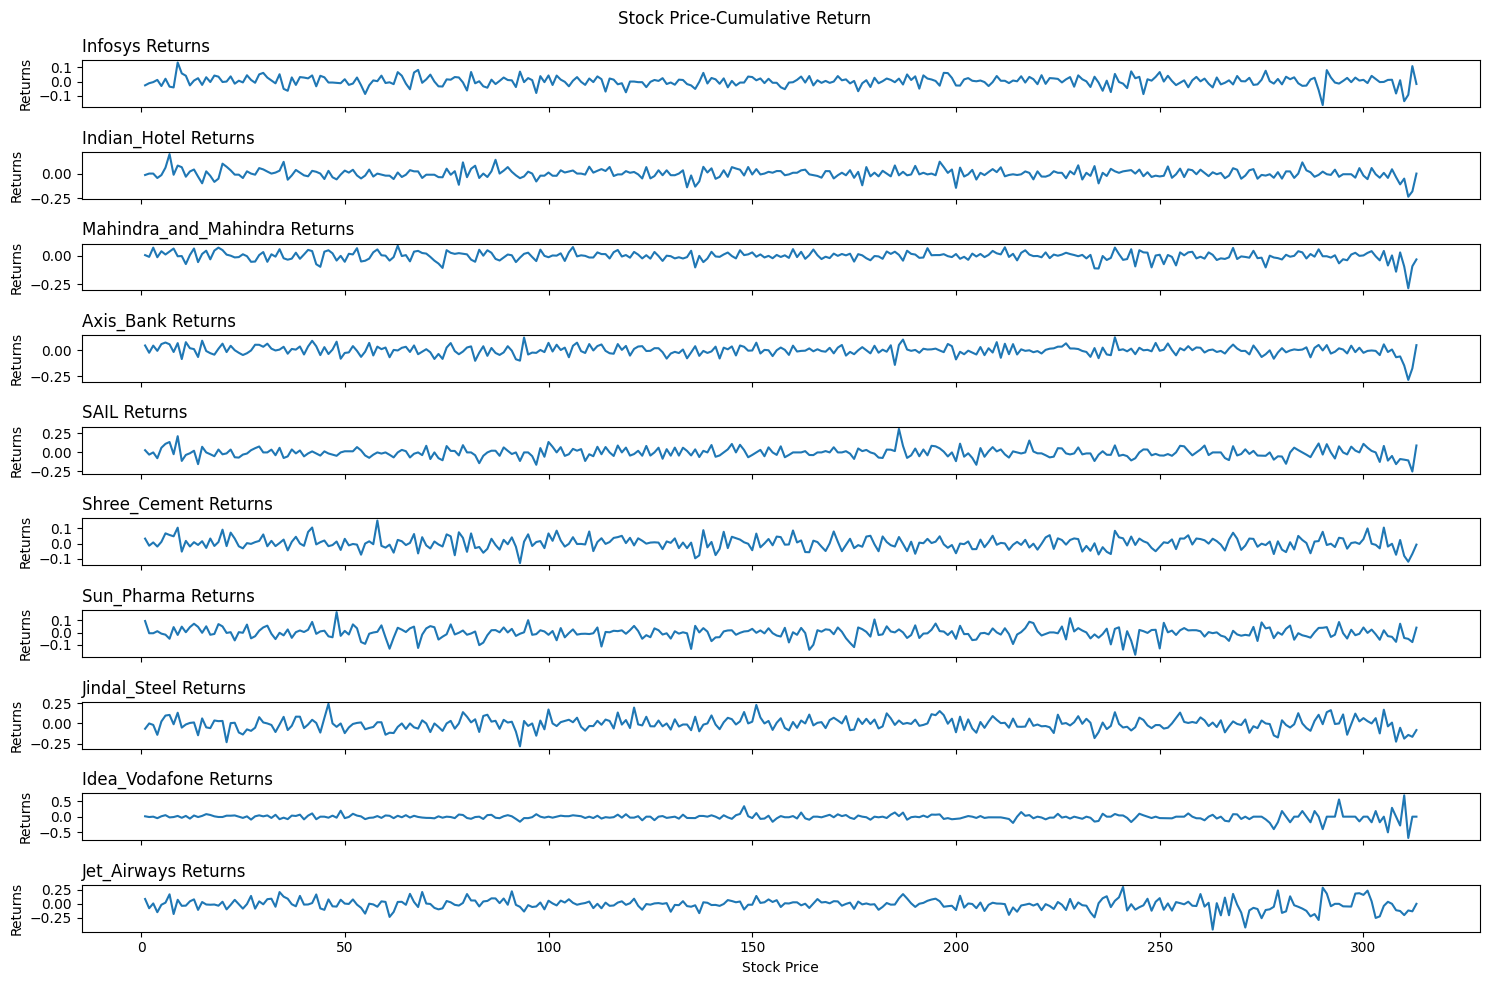

In [17]:
#Plotting the stock returns
fig, axes = plt.subplots(nrows=len(stock_returns.columns), figsize=(15, 10), sharex=True)
for i, column in enumerate(stock_returns.columns):
    axes[i].plot(stock_returns.index, stock_returns[column], label=column)
    axes[i].set_ylabel("Returns")
    axes[i].set_title(f"{column} Returns", loc='left')
plt.xlabel("Stock Price")
fig.suptitle("Stock Price-Cumulative Return")
plt.tight_layout()
plt.show()


**Inferences from Stock Returns Descriptive Statistics:**

1. **Infosys:**
   - The average weekly return for Infosys stock is positive at approximately 0.28%, indicating modest positive performance.
   - The standard deviation of returns is relatively low at 3.51%, suggesting moderate volatility.
   - The stock's returns have ranged from a minimum of -16.73% to a maximum of 13.57% over the observed period.

2. **Indian Hotel:**
   - Indian Hotel exhibits a minimal average return of approximately 0.03%, indicating relatively stable performance.
   - The stock experiences relatively high volatility with a standard deviation of 4.71%.
   - The returns have ranged from a minimum of -23.64% to a maximum of 19.93%.

3. **Mahindra and Mahindra:**
   - The stock has a slightly negative average return of -0.15%, suggesting a generally conservative investment.
   - Volatility, as indicated by the standard deviation of 4.02%, is moderate.
   - Returns range from -28.53% to a maximum of 8.94%.

4. **Axis Bank:**
   - Axis Bank shows a modest positive average return of approximately 0.11%.
   - The stock's returns exhibit moderate volatility with a standard deviation of 4.58%.
   - Returns vary from a minimum of -28.48% to a maximum of 12.75%.

5. **SAIL:**
   - SAIL has a negative average return of -0.34%, indicating a challenging period for investors.
   - The stock experiences relatively high volatility, with a standard deviation of 6.22%.
   - Returns range from -25.13% to a maximum of 30.90%.

6. **Shree Cement:**
   - Shree Cement has a positive average return of approximately 0.37%, suggesting a relatively favorable investment.
   - Volatility is moderate, with a standard deviation of 3.99%.
   - Returns span from -12.92% to a maximum of 15.23%.

7. **Sun Pharma:**
   - Sun Pharma has a slightly negative average return of -0.15%.
   - The stock exhibits moderate volatility with a standard deviation of 4.50%.
   - Returns have ranged from -17.99% to a maximum of 16.66%.

8. **Jindal Steel:**
   - Jindal Steel demonstrates a negative average return of -0.41%, signaling challenging performance.
   - The stock experiences relatively high volatility, with a standard deviation of 7.51%.
   - Returns span from -28.38% to a maximum of 24.40%.

9. **Idea Vodafone:**
   - Idea Vodafone has a significantly negative average return of -1.06%, indicating substantial challenges.
   - The stock displays high volatility, with a standard deviation of 10.43%.
   - Returns vary from a minimum of -69.31% to a maximum of 69.31%.

10. **Jet Airways:**
    - Jet Airways exhibits a negative average return of -0.95%, reflecting a difficult period for the company.
    - The stock has relatively high volatility, with a standard deviation of 9.80%.
    - Returns range from -45.86% to a maximum of 30.02%.

### Means & Standard Deviations of returns

- Stock Means: Average returns that the stock is making on a week to week basis
- Stock Standard Deviation : It is a measure of volatility meaning the more a stock's returns vary from the stock's average return, the more volatile the stock

#### Calculating stock means

In [18]:
stock_means = stock_returns.mean(axis = 0)
print(stock_means)

Infosys                  0.002794
Indian_Hotel             0.000266
Mahindra_and_Mahindra   -0.001506
Axis_Bank                0.001167
SAIL                    -0.003463
Shree_Cement             0.003681
Sun_Pharma              -0.001455
Jindal_Steel            -0.004123
Idea_Vodafone           -0.010608
Jet_Airways             -0.009548
dtype: float64


#### Calculating stock standard deviation

In [19]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys                  0.035070
Indian_Hotel             0.047131
Mahindra_and_Mahindra    0.040169
Axis_Bank                0.045828
SAIL                     0.062188
Shree_Cement             0.039917
Sun_Pharma               0.045033
Jindal_Steel             0.075108
Idea_Vodafone            0.104315
Jet_Airways              0.097972
dtype: float64

In [20]:
df1 = pd.DataFrame({'Average': stock_means, 'Volatility': stock_sd})
df1

,Average,Volatility
Infosys,0.002794,0.035070
Indian_Hotel,0.000266,0.047131
Mahindra_and_Mahindra,-0.001506,0.040169
Axis_Bank,0.001167,0.045828
SAIL,-0.003463,0.062188
Shree_Cement,0.003681,0.039917
Sun_Pharma,-0.001455,0.045033
Jindal_Steel,-0.004123,0.075108
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972


In [21]:
#Sorted on Average
df1.sort_values(by=['Average'], ascending=False)

,Average,Volatility
Shree_Cement,0.003681,0.039917
Infosys,0.002794,0.035070
Axis_Bank,0.001167,0.045828
Indian_Hotel,0.000266,0.047131
Sun_Pharma,-0.001455,0.045033
Mahindra_and_Mahindra,-0.001506,0.040169
SAIL,-0.003463,0.062188
Jindal_Steel,-0.004123,0.075108
Jet_Airways,-0.009548,0.097972
Idea_Vodafone,-0.010608,0.104315


In [22]:
df1.sort_values(by=['Volatility'], ascending=False)

,Average,Volatility
Idea_Vodafone,-0.010608,0.104315
Jet_Airways,-0.009548,0.097972
Jindal_Steel,-0.004123,0.075108
SAIL,-0.003463,0.062188
Indian_Hotel,0.000266,0.047131
Axis_Bank,0.001167,0.045828
Sun_Pharma,-0.001455,0.045033
Mahindra_and_Mahindra,-0.001506,0.040169
Shree_Cement,0.003681,0.039917
Infosys,0.002794,0.035070


#### Let us plot & see what they say about stock prices

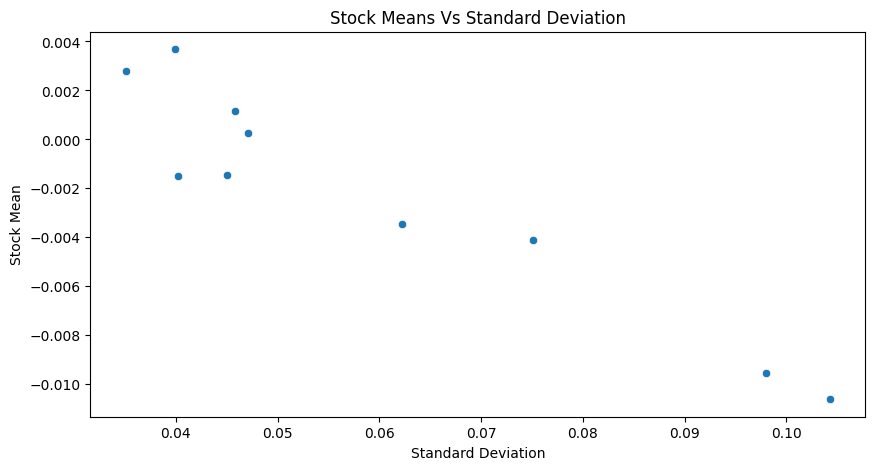

In [23]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df1['Volatility'], y=df1['Average'], palette="deep")
plt.ylabel("Stock Mean")
plt.xlabel("Standard Deviation")
plt.title("Stock Means Vs Standard Deviation")
plt.show()

In [24]:
#Let's make it interactive to see which datapoint belongs to which stock
import plotly.express as px

fig = px.scatter(df1, x='Volatility', y='Average', text=df1.index, title="Stock Means Vs Standard Deviation")
fig.update_traces(textposition='bottom center')
fig.update_layout(
    xaxis_title="Standard Deviation",
    yaxis_title="Stock Mean",
    showlegend=False,
    height=700,
    width=1200,
)

fig.show()


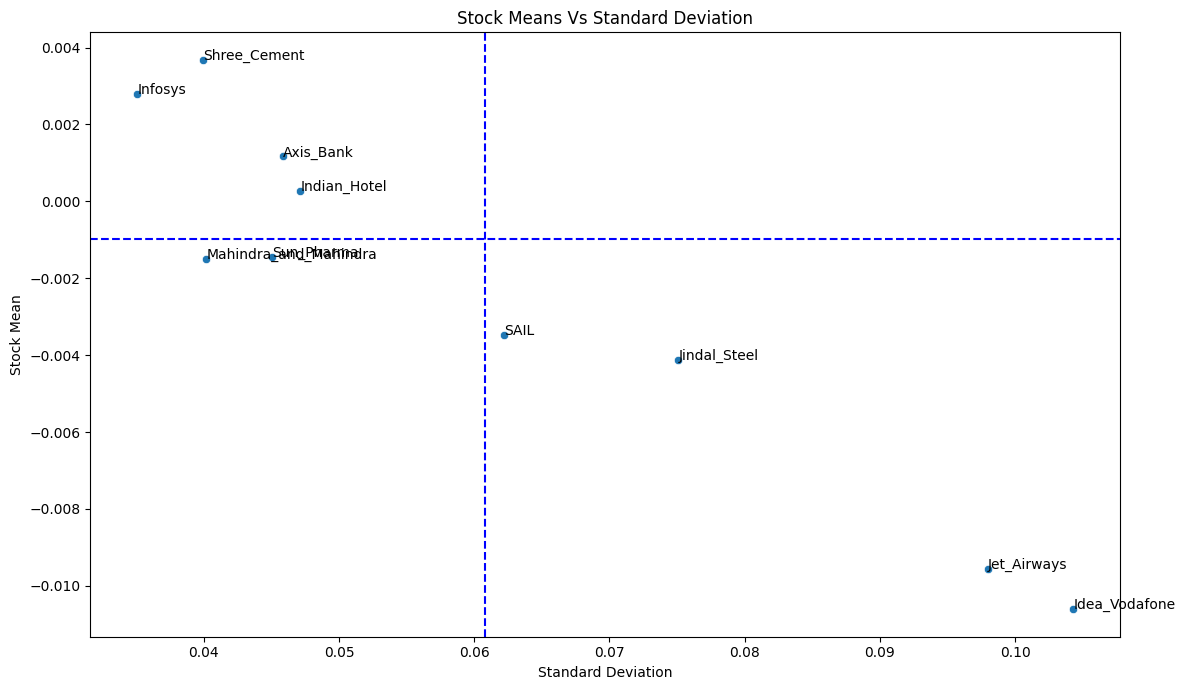

In [25]:
#Since we do not have other market details, taking mean of Average Price & Standard Deviation from the portfolio to draw the axis line
plt.figure(figsize=(12, 7))
sns.scatterplot(x=df1['Volatility'], y=df1['Average'], palette="deep")
for i, txt in enumerate(df1.index):
    plt.annotate(txt, (df1['Volatility'][i], df1['Average'][i]))
plt.ylabel("Stock Mean")
plt.axvline(x=0.060774,linestyle='--', color = "blue")
plt.axhline(y=-0.0009761 ,linestyle='--', color = "blue")
plt.xlabel("Standard Deviation")
plt.title("Stock Means Vs Standard Deviation")
plt.tight_layout()
plt.show()


**Conclusion:**

The stocks with negative average returns (Idea Vodafone, Jet Airways, Jindal Steel, SAIL ) generally have higher volatility, suggesting a downward trend with significant price swings. Mahindra and Mahindra and Sun Pharma have low volatility as well as negative average,

On the other hand, stocks with positive average returns (Axis Bank, Indian Hotel, Shree Cement, Infosys) tend to have lower volatility, indicating more stable and positive trends.


**Recommendation**

Among the listed stocks, Infosys and Shree Cement exhibit the most favourable combination of high average returns and low volatility. Hence, stocks with higher returns relative to their risk level are considered better among the available options.